<a href="https://colab.research.google.com/github/ThemindaSrimal/ANN-FruitVeg/blob/main/FruitVeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theminda","key":"9cd44bd1a6c19301cb1756fd798cd8f6"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13776  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8284  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3688  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1597  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 2.18G/2.19G [00:24<00:00, 38.2MB/s]
100% 2.19G/2.19G [00:24<00:00, 95.1MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

### Creating Data

In [ ]:
import os
import cv2
import numpy as np
from numpy import save
from numpy.core.defchararray import index

# Array of all the classes 

class_names = ["banana", "apple", "pear", "grapes", "orange", "kiwi", "watermelon", "pomegranate", "pineapple", "mango", "cucumber", "carrot", "capsicum", "onion", "potato", "lemon", "tomato", "raddish", "beetroot", "cabbage", "lettuce", "spinach", "soy beans", "cauliflower", "bell pepper", "chilli pepper", "turnip", "corn", "sweetcorn", "sweetpotato", "paprika", "jalepeno", "ginger", "garlic", "peas", "eggplant"]

train_data_array = []
train_data_labels_array = []

print ("Loading the train data ")

rootdir = "/content/train"

for subdir , dirs , files in os.walk(rootdir):
    for file in files:
        # open each image in the folders
        frame = cv2.imread(os.path.join(subdir, file))

        # check the validity of the image 
        if frame is None:
            print("not an image")
        else:
            print(subdir,file)

            # check the sizes of the images to see if all are the same
            # each image has its own size and dimensions
            # resize all the images to the same size
            # reduce the size of the images to 28X28
            resized = cv2.resize(frame,(28,28), interpolation=cv2.INTER_AREA)
            checkSize = resized.shape[0] #checking that the resize was done successfuly
            if checkSize ==28 :
                train_data_array.append(resized)
                index = class_names.index(os.path.basename(subdir))
                train_data_labels_array.append(index)

# converts the lists to numpy arrays
train_data = np.array(train_data_array)
train_data_lables = np.array(train_data_labels_array)

print ("Finished loading the train data")
print ("Number of train records : ", train_data.shape[0] )

print(train_data.shape)
print(train_data_lables.shape)


# save the data to the disk in numpy binary format:

save('/content/temp/train_data.npy', train_data)
save('/content/temp/train_data_labels.npy', train_data_lables)


# continue to the test data 
print("Start loading the test data ")
rootdir = "/content/test"

test_data_array = []
test_data_labels_array = []

# build another arrray for the bigger images
test_data_big_array = []


for subdir , dirs , files in os.walk(rootdir):
    for file in files:
        # open each image in the folders
        frame = cv2.imread(os.path.join(subdir, file))

        # check the validity of the image 
        if frame is None:
            print("not an image")
        else:
            print(subdir,file)
            # ability to see a "normal" size image
            resizedBig = resized = cv2.resize(frame,(280,280), interpolation=cv2.INTER_AREA)
            resized = cv2.resize(frame,(28,28), interpolation=cv2.INTER_AREA)
            checkSize = resized.shape[0] #checking that the resize was done successfuly
            if checkSize ==28 :
                test_data_array.append(resized)
                test_data_big_array.append(resizedBig)
                index = class_names.index(os.path.basename(subdir))
                test_data_labels_array.append(index)

test_data = np.array(test_data_array)
test_data_big = np.array(test_data_big_array)
test_data_labels = np.array(test_data_labels_array)

print("Finished loading the test data ")
print ("Number of test records : ", test_data.shape[0] )
print(test_data.shape)
print(test_data_labels.shape)

# save the numpy arrays as numpy binary to the disk 
save('/content/temp/test_data.npy', test_data)
save('/content/temp/test_data_big.npy', test_data_big)
save('/content/temp/test_data_labels.npy', test_data_labels)


Loading the train data 
/content/train/peas Image_80.jpg
/content/train/peas Image_40.jpg
/content/train/peas Image_12.jpg
/content/train/peas Image_31.jpg
/content/train/peas Image_69.jpg
/content/train/peas Image_75.jpg
/content/train/peas Image_92.jpg
/content/train/peas Image_3.jpg
/content/train/peas Image_73.jpg
/content/train/peas Image_95.jpg
/content/train/peas Image_46.jpg
/content/train/peas Image_87.jpg
/content/train/peas Image_94.jpg
/content/train/peas Image_17.jpg
/content/train/peas Image_6.jpg
/content/train/peas Image_60.jpg
/content/train/peas Image_82.jpg
/content/train/peas Image_34.jpg
/content/train/peas Image_89.jpg
/content/train/peas Image_49.jpg
/content/train/peas Image_36.jpg
/content/train/peas Image_25.jpg
/content/train/peas Image_45.jpg
/content/train/peas Image_2.jpg
/content/train/peas Image_37.png
/content/train/peas Image_84.jpg
/content/train/peas Image_24.jpg
/content/train/peas Image_18.jpg
/content/train/peas Image_21.jpg
/content/train/peas Im

### Build the Model

In [ ]:
import os
import cv2
import numpy as np
from numpy import load
from numpy.core.defchararray import index
from google.colab.patches import cv2_imshow


import tensorflow as tf 
from tensorflow import keras
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2" # Reduce the information messages

# Array of all the classes 
class_names = ["banana", "apple", "pear", "grapes", "orange", "kiwi", "watermelon", "pomegranate", "pineapple", "mango", "cucumber", "carrot", "capsicum", "onion", "potato", "lemon", "tomato", "raddish", "beetroot", "cabbage", "lettuce", "spinach", "soy beans", "cauliflower", "bell pepper", "chilli pepper", "turnip", "corn", "sweetcorn", "sweetpotato", "paprika", "jalepeno", "ginger", "garlic", "peas", "eggplant"]

#load the saved train and test data
train_data = load('/content/temp/train_data.npy')
train_data_lables = load('/content/temp/train_data_labels.npy')
test_data = load('/content/temp/test_data.npy')
test_data_big = load('/content/temp/test_data_big.npy')
test_data_labels = load('/content/temp/test_data_labels.npy')

print("Finish loading the data ")

print("train shape : ", train_data.shape)
print("train lables shape : ", train_data_lables.shape)
print("test data shape:", test_data.shape)
print("test data labels shape:", test_data_labels.shape)

# 3579 images to train in a 28X28 resolution with 3 channels (RGB)
# After the train, test the images with 359 test data

# the values of each pixel is 0 to 255 -> change it between 0 to 1

train_data = train_data / 255.0
test_data = test_data / 255.0

# build the model

model = keras.Sequential([
    # flatten the images, take the 28X28X3 and flatten the shape as the input to the model
    keras.layers.Flatten(input_shape=(28,28,3)),  # this is the input layer

    # define the hidden layer.
    # we dont know what is the exact number , so try with 512 neurons
    keras.layers.Dense(512,activation='relu'), # relu has no negative values.

    # this is the last layer - the classifation for the classes 
    # we have 36 classes (Apple , banana , orange .........)
    keras.layers.Dense(36,activation='softmax') # softmax has return values between 0 to 1 
])

print('Finish build the model skeleton')

# compile the model
model.compile(
    # optimizer -> calulate the gradient descent of the network
    optimizer='adam',
    # loss function
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'] # metrics measurment
)

print('Finish compiling the model')

# train the model
# start with a 10 epochs , but probebly will update the number to a bigger one during the sessions
model.fit(train_data,train_data_lables,epochs=120)

# got loss: 0.2574 - accuracy: 0.9329
# test it on a new data . A data that the model never seen

test_loss , test_acc = model.evaluate(test_data,test_data_labels,verbose=1) # verbose is a paramter of how detailed is the log in the console
print("*******************         Test accuracy : ", test_acc)

# a result of : Test accuracy :  0.941504180431366  ## very good result - near 1


Finish loading the data 
train shape :  (3579, 28, 28, 3)
train lables shape :  (3579,)
test data shape: (359, 28, 28, 3)
test data labels shape: (359,)
Finish build the model skeleton
Finish compiling the model
Epoch 1/120
112/112 [==============================] - 2s 9ms/step - loss: 3.6329 - accuracy: 0.0615
Epoch 2/120
112/112 [==============================] - 1s 10ms/step - loss: 3.1701 - accuracy: 0.1162
Epoch 3/120
112/112 [==============================] - 1s 9ms/step - loss: 2.9834 - accuracy: 0.1679
Epoch 4/120
112/112 [==============================] - 1s 10ms/step - loss: 2.8719 - accuracy: 0.1922
Epoch 5/120
112/112 [==============================] - 1s 10ms/step - loss: 2.7935 - accuracy: 0.2123
Epoch 6/120
112/112 [==============================] - 1s 10ms/step - loss: 2.7202 - accuracy: 0.2300
Epoch 7/120
112/112 [==============================] - 1s 10ms/step - loss: 2.6324 - accuracy: 0.2529
Epoch 8/120
112/112 [==============================] - 1s 9ms/step - loss: 2

### Doing predictions

The predicted class index :
26
the class name : turnip


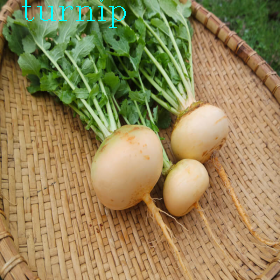

Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : peas      Original / real class name : peas
Predicted class : chilli pepper      Original / real class name : chilli pepper
Predicted class : chilli pepper      Original / real class name : chilli pepper
Predicted class : chilli pepper      Original / real class name : chilli pepper
Predicted class : chilli pepper      Original / real class name : chilli pepper
Predicted class : chilli pepper      Original / real class n

In [ ]:
# predictions
predictions = model.predict(test_data)

# show the predictions of a specific image , for example : image number 100
print ('The predicted class index :')

# show the outcome 
# for every test image we will get 36 numbers between 0 to 1
# got 36 numbers.
# the higher number is the predicted class , so extract the index in the 36 list

class_index = np.argmax(predictions[100]) # get the max value
print(class_index)

class_name = class_names[class_index]
print('the class name :', class_name)

# lshow the image number 100
# saved test data as bigger files 280X280, use it now

demoImage = test_data_big[100]
cv2.putText(demoImage,class_name,(20,20),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0),1)
#cv2.imshow('demoImage',demoImage)
cv2_imshow(demoImage)
cv2.waitKey(0)

# compare all the results :

for predict , test_label in zip(predictions,test_data_labels):
    class_index = np.argmax(predict)
    class_name_predict = class_names[class_index]

    class_name_original = class_names[test_label]

    print('Predicted class :',class_name_predict , '     Original / real class name :', class_name_original )

In [ ]:
In above program activation function for hidden layer is relu and activation function for last layer is softmax

For the model optimizer is adam and loss function is sparse_categorical_crossentropy

### Same process by changing different parameters

In [ ]:
import os
import cv2
import numpy as np
from numpy import load
from numpy.core.defchararray import index
from google.colab.patches import cv2_imshow


import tensorflow as tf 
from tensorflow import keras
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2" # Reduce the information messages

# Array of all the classes 
class_names = ["banana", "apple", "pear", "grapes", "orange", "kiwi", "watermelon", "pomegranate", "pineapple", "mango", "cucumber", "carrot", "capsicum", "onion", "potato", "lemon", "tomato", "raddish", "beetroot", "cabbage", "lettuce", "spinach", "soy beans", "cauliflower", "bell pepper", "chilli pepper", "turnip", "corn", "sweetcorn", "sweetpotato", "paprika", "jalepeno", "ginger", "garlic", "peas", "eggplant"]

#load the saved train and test data
train_data = load('/content/temp/train_data.npy')
train_data_lables = load('/content/temp/train_data_labels.npy')
test_data = load('/content/temp/test_data.npy')
test_data_big = load('/content/temp/test_data_big.npy')
test_data_labels = load('/content/temp/test_data_labels.npy')

print("Finish loading the data ")

print("train shape : ", train_data.shape)
print("train lables shape : ", train_data_lables.shape)
print("test data shape:", test_data.shape)
print("test data labels shape:", test_data_labels.shape)

# 3579 images to train in a 28X28 resolution with 3 channels (RGB)
# After the train, test the images with 359 test data

# the values of each pixel is 0 to 255 -> change it between 0 to 1

train_data = train_data / 255.0
test_data = test_data / 255.0

# build the model

model = keras.Sequential([
    # flatten the images, take the 28X28X3 and flatten the shape as the input to the model
    keras.layers.Flatten(input_shape=(28,28,3)),  # this is the input layer

    # define the hidden layer.
    # we dont know what is the exact number , so try with 512 neurons
    keras.layers.Dense(512,activation='relu'), # relu has no negative values.

    # this is the last layer - the classifation for the classes 
    # we have 36 classes (Apple , banana , orange .........)
    keras.layers.Dense(36,activation='softmax') # softmax has return values between 0 to 1 
])

print('Finish build the model skeleton')

# compile the model
model.compile(
    # optimizer -> calulate the gradient descent of the network
    optimizer='RMSprop',
    # loss function
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'] # metrics measurment
)

print('Finish compiling the model')

# train the model
# start with a 10 epochs , but probebly will update the number to a bigger one during the sessions
model.fit(train_data,train_data_lables,epochs=120)

# got loss: 0.2574 - accuracy: 0.9329
# test it on a new data . A data that the model never seen

test_loss , test_acc = model.evaluate(test_data,test_data_labels,verbose=1) # verbose is a paramter of how detailed is the log in the console
print("*******************         Test accuracy : ", test_acc)

# a result of : Test accuracy :  0.941504180431366  ## very good result - near 1


Finish loading the data 
train shape :  (3579, 28, 28, 3)
train lables shape :  (3579,)
test data shape: (359, 28, 28, 3)
test data labels shape: (359,)
Finish build the model skeleton
Finish compiling the model
Epoch 1/120
112/112 [==============================] - 2s 15ms/step - loss: 4.1610 - accuracy: 0.0464
Epoch 2/120
112/112 [==============================] - 2s 15ms/step - loss: 3.3299 - accuracy: 0.0956
Epoch 3/120
112/112 [==============================] - 2s 16ms/step - loss: 3.0878 - accuracy: 0.1425
Epoch 4/120
112/112 [==============================] - 2s 16ms/step - loss: 2.9389 - accuracy: 0.1718
Epoch 5/120
112/112 [==============================] - 2s 16ms/step - loss: 2.8351 - accuracy: 0.1989
Epoch 6/120
112/112 [==============================] - 2s 15ms/step - loss: 2.7343 - accuracy: 0.2291
Epoch 7/120
112/112 [==============================] - 2s 16ms/step - loss: 2.6637 - accuracy: 0.2375
Epoch 8/120
112/112 [==============================] - 2s 17ms/step - loss

**When changing the optimizer followings are the results**

Adam = loss: 0.0727 - accuracy: 0.9805

SGD = loss: 0.4848 - accuracy: 0.8663

Adagrad = loss: 1.6644 - accuracy: 0.6574

RMSprop = loss: 0.2808 - accuracy: 0.9204